# Handwritten digit recognition

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [8]:
X, y = load_data()

In [10]:
print(f"X.shape = {X.shape}")

X.shape = (1000, 400)


In [13]:
print(f"{X[0]}")

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [17]:
#first and last value of y label
print(f"shape of y: {y.shape}")

print(f"First value : {y[0,0]} and Last value: {y[-1, 0]}")

shape of y: (1000, 1)
First value : 0 and Last value: 1


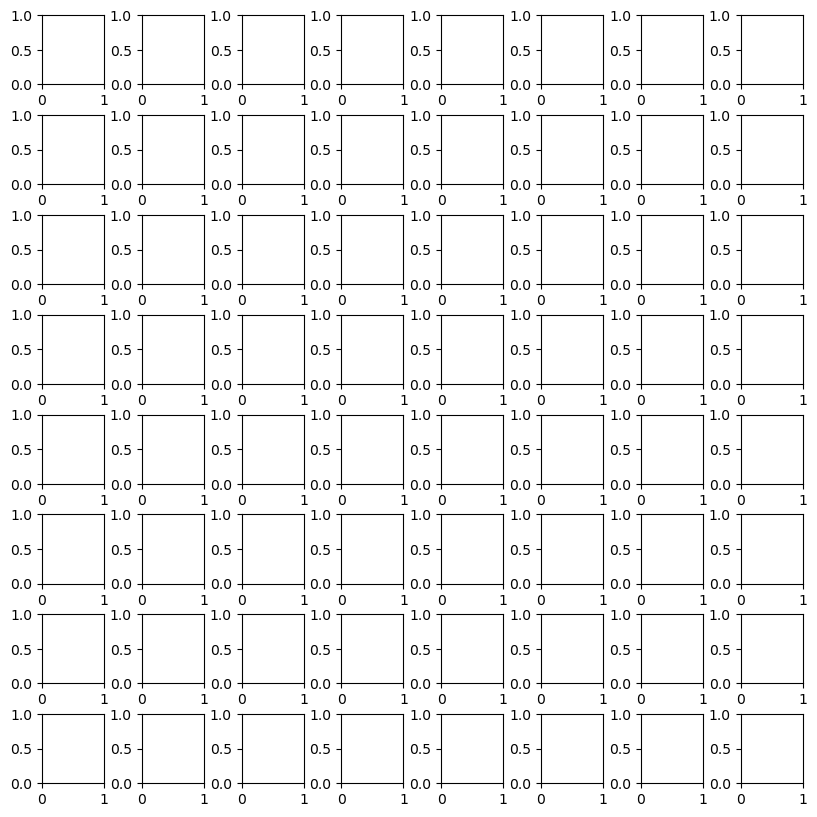

In [18]:
#visualization of data

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

m,n = X.shape

fig, ax = plt.subplots(8,8, figsize = (8,8))
fig.tight_layout(pad = 0.1)

for i,ax in enumerate(axes.flat):
    
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    #display the image
    ax.imshow(X_random_reshaped, cmap = 'gray')
    
    #display the label above each image
    ax.set_title(y[random_index,0])
    ax.set